In [1]:
#project: p10
#submitter: ytian83
#partner: none

In [2]:
#import
import os
import pandas as pd
from pandas import DataFrame, Series
import requests 
import json
from bs4 import BeautifulSoup
import math
import sqlite3

In [3]:
#functions 
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    resp = requests.get(url)
    resp.raise_for_status()
    url_text=resp.text
    f = open(os.path.join(".", filename), "w")
    f.write(url_text)
    f.close()
    return (str(filename) + " created!")

In [4]:
download("countries.json","https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json" )

'countries.json already exists!'

In [5]:
countries=pd.read_json('countries.json')
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
#q1
len(set(list(countries.country)))

174

In [7]:
#q2
sum(countries["area"])

127170843

In [8]:
download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

'capitals.html already exists!'

In [9]:
url = 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html'
resp = requests.get(url)
resp.raise_for_status()
page = BeautifulSoup(resp.text, "html.parser")
tables = page.find("table")
row = tables.find_all("tr")
temp_list=[]
for i in row[1:]:
    col_list = i.find_all("td")
    for j in range(len(col_list)):
        col_list[j]=col_list[j].text
    temp_dict ={}
    temp_dict["country"]=col_list[0]
    temp_dict["capital"]=col_list[1]
    temp_dict["latitude"]=float(col_list[2])
    temp_dict["longitude"]=float(col_list[3])
    if temp_dict["country"] in list(countries.country):
        temp_list.append(temp_dict)
f = open("capitals.json", "w",encoding="utf-8")
json.dump(temp_list,f)
f.close()

capitals=pd.read_json("capitals.json")
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [10]:
#q3
s=list(capitals.country)
s.sort()
s

['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [11]:
#q4
next(iter(capitals[capitals["country"]=="Cuba"]["capital"]))

'Havana'

In [12]:
#q5
next(iter(capitals[capitals["capital"]=="Tbilisi"]["country"]))

'Georgia'

In [13]:
#q6
list(capitals.sort_values(by=["latitude"])[:7].country)


['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [14]:
#q7
list(capitals.sort_values(by=["latitude"],ascending=False)[:5].country)

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [15]:
#q8
countries.describe()[["birth-rate","death-rate" ]]

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [16]:
#q9
countries.literacy=countries["literacy"].str.replace(",",".")
countries.phones=countries["phones"].str.replace(",",".")
countries=countries.astype({"literacy":'float64',"phones":'float64'})
countries.describe()[["literacy","phones"]]


,literacy,phones
count,174.000000,174.000000
mean,82.362069,215.770690
std,20.003166,218.713811
min,17.600000,1.300000
25%,70.100000,32.000000
50%,92.100000,140.350000
75%,98.000000,331.750000
max,100.000000,1035.600000


In [17]:
#q10

def find(continent):
    df=countries[(countries["continent"]==continent) & (countries.coastline == 0)]
    a=next(iter(df[df.area == df.area.max()]["country"]))
    return a

find("Europe")


'Belarus'

In [18]:
#q11
find("Asia")

'Kazakhstan'

In [19]:
#q12
def find1(continent):
    df=countries[(countries["continent"]==continent) & (countries.coastline == 0)]
    a=next(iter(df[df.population == df.population.max()]["country"]))
    return a

find1("Asia")

'Afghanistan'

In [20]:
#q13

def dis(lo1,lo2,la1,la2):
    lon1=math.radians(lo1)
    lon2=math.radians(lo2)
    lat1=math.radians(la1)
    lat2=math.radians(la2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (math.sin(dlat/2))**2 + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2))**2
    c = 2 * math.asin(min(1,(a)**0.5))
    d = 3956 * c
    return d
    
dis(-89.411893,-89.384113, 43.070231, 43.074645)

1.433899492072933

In [21]:
#q14

def dis2(country1,country2):
    df=capitals[(capitals["country"]==country1)|(capitals["country"]==country2)]
    return dis(df.longitude.iloc[0], df.longitude.iloc[1], df.latitude.iloc[0], df.latitude.iloc[1])
   
dis2("France","Japan")

6032.330932363535

In [22]:
#q15
country_list=["Guam","New Zealand","Australia"]

def distance(countries_list):
    df=pd.DataFrame(index=countries_list,columns=countries_list)
    for x in range (len(countries_list)):
        for y in range (len(countries_list)):
            if x!= y:
                df.iloc[x,y]=dis2(countries_list[x],countries_list[y])
    return df.astype(float)

distance(country_list) 

,Guam,New Zealand,Australia
Guam,NaN,4239.314912,3377.103870
New Zealand,4239.314912,NaN,1445.147895
Australia,3377.103870,1445.147895,NaN


In [23]:
#q16
cl=list(countries[countries["continent"]=="Australia"].country)
aus=distance(cl)
aus

,Marshall Islands,French Polynesia,New Zealand,Vanuatu,Palau,Papua New Guinea,Guam,Samoa,New Caledonia,Australia,Fiji,Tonga
Marshall Islands,NaN,3159.856137,3348.725378,1727.328621,2516.301728,2019.144119,1861.584428,1849.150692,2054.905160,3263.901948,1806.972599,2151.129410
French Polynesia,3159.856137,NaN,2668.807328,2765.339382,5447.018761,4265.757856,4961.131713,1496.953816,2864.497308,3920.570216,2102.135722,1686.539411
New Zealand,3348.725378,2668.807328,NaN,1671.641167,4218.188412,2767.607095,4239.314912,2062.548020,1400.483623,1445.147895,1613.916992,1510.219450
Vanuatu,1727.328621,2765.339382,1671.641167,NaN,2882.041892,1527.495923,2687.395771,1349.904435,335.602971,1687.810709,663.967196,1098.016273
Palau,2516.301728,5447.018761,4218.188412,2882.041892,NaN,1453.306058,800.243081,3956.305436,2974.892838,3099.023227,3468.037102,3931.843110
Papua New Guinea,2019.144119,4265.757856,2767.607095,1527.495923,1453.306058,NaN,1591.171595,2789.123270,1552.708901,1786.749660,2174.712829,2623.742354
Guam,1861.584428,4961.131713,4239.314912,2687.395771,800.243081,1591.171595,NaN,3520.883355,2871.868601,3377.103870,3165.570014,3617.512808
Samoa,1849.150692,1496.953816,2062.548020,1349.904435,3956.305436,2789.123270,3520.883355,NaN,1542.152644,2840.091065,716.316054,553.393188
New Caledonia,2054.905160,2864.497308,1400.483623,335.602971,2974.892838,1552.708901,2871.868601,1542.152644,NaN,1375.924712,825.890876,1179.069567
Australia,3263.901948,3920.570216,1445.147895,1687.810709,3099.023227,1786.749660,3377.103870,2840.091065,1375.924712,NaN,2145.768971,2362.766922


In [24]:
#q17
s=aus.mean().sort_values(ascending=True)
s.index[0]

'Vanuatu'

In [25]:
#q18
s=aus.mean().sort_values(ascending=False)
s.index[0]

'French Polynesia'

In [26]:
#q19
pd.DataFrame({"nearest":aus.idxmin(), "distance":aus.min()})

,nearest,distance
Marshall Islands,Vanuatu,1727.328621
French Polynesia,Samoa,1496.953816
New Zealand,New Caledonia,1400.483623
Vanuatu,New Caledonia,335.602971
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Guam,Palau,800.243081
Samoa,Tonga,553.393188
New Caledonia,Vanuatu,335.602971
Australia,New Caledonia,1375.924712


In [27]:
#q20
pd.DataFrame({"furthest":aus.idxmax(), "distance":aus.max()})

,furthest,distance
Marshall Islands,New Zealand,3348.725378
French Polynesia,Palau,5447.018761
New Zealand,Guam,4239.314912
Vanuatu,Palau,2882.041892
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Guam,French Polynesia,4961.131713
Samoa,Palau,3956.305436
New Caledonia,Palau,2974.892838
Australia,French Polynesia,3920.570216


In [28]:

conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [29]:
pd.read_sql("select * from sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,countries,countries,2,"CREATE TABLE ""countries"" (\n""area"" INTEGER,\n ..."
1,table,capitals,capitals,8,"CREATE TABLE ""capitals"" (\n""country"" TEXT,\n ..."


In [30]:

pd.read_sql("select * from capitals", conn).head(3)

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000


In [31]:
#q21

def qry(sql, cap=10):
    return pd.read_sql(sql, conn).head(cap)

qry = """
SELECT continent, COUNT(country) AS `number of countries`
FROM countries
GROUP BY continent
ORDER BY `number of countries` ASC
"""
q21=pd.read_sql(qry, conn)
q21

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [32]:
%matplotlib inline

Text(0, 0.5, 'number of countries')

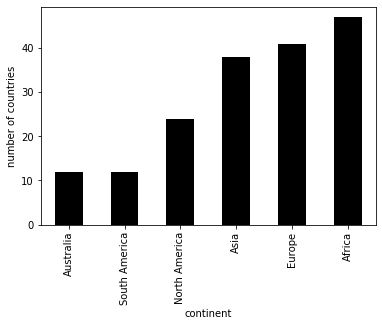

In [33]:
#q22
q21a= q21.set_index("continent")
con= q21a['number of countries']
ax=con.plot.bar(color="Black")
ax.set_ylabel("number of countries")

In [34]:
#q23

qry = """
SELECT continent, sum(population)/1000000 AS `total population (million)`
FROM countries
GROUP BY continent
ORDER BY `total population (million)` DESC
"""
q23=pd.read_sql(qry, conn)
q23


,continent,total population (million)
0,Asia,3739
1,Africa,807
2,Europe,792
3,North America,515
4,South America,375
5,Australia,32


Text(0, 0.5, 'total population (million)')

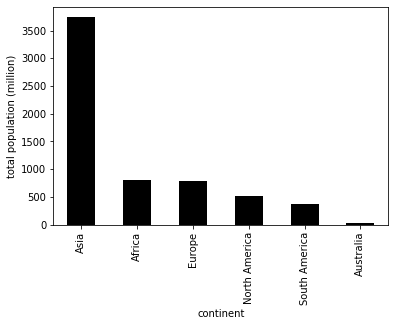

In [35]:
#q24
q23a= q23.set_index("continent")
q24b= q23a['total population (million)']
ax24=q24b.plot.bar(color="Black")
ax24.set_ylabel("total population (million)")

In [36]:
#q25


qry = """
SELECT country, population
FROM countries
WHERE continent = "South America"
ORDER BY population DESC
"""
q25=pd.read_sql(qry, conn)
q25

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [37]:
#q26

#q26_big=countries.astype({"gdp-per-capita":"float", 
#                          "population":"float"})

qry = """
SELECT country, (population*`gdp-per-capita`)/1000000000.0 AS "real GDP (billion)"
FROM countries
ORDER BY "real GDP (billion)" DESC
LIMIT 10
"""
q26=pd.read_sql(qry, conn)
q26

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


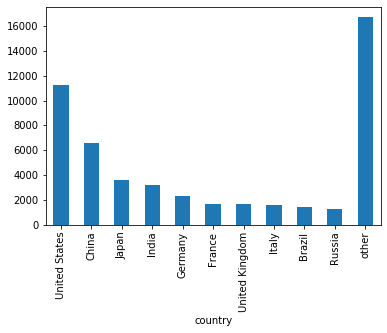

In [38]:
#q27
qry = """
SELECT country, (population*`gdp-per-capita`)/1000000000.0 AS "real GDP (billion)"
FROM countries
ORDER BY "real GDP (billion)" DESC
"""
df=pd.read_sql(qry, conn).set_index("country")
q=df["real GDP (billion)"]
other=q[10:].sum()
top10=q[:10]
top10["other"] = other
top10.plot.bar()

In [39]:
#q28
qry = """
SELECT country, "birth-rate", "death-rate"
FROM countries
ORDER BY abs("birth-rate" - "death-rate") DESC
LIMIT 15
"""

q28=pd.read_sql(qry, conn)
q28

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5, 0, 'rate')

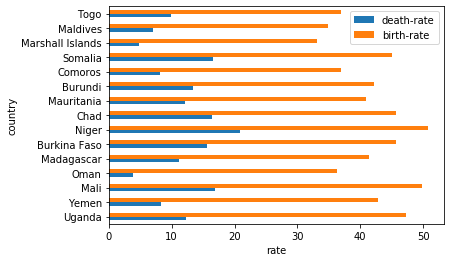

In [40]:
#q29
q29a= q28.set_index("country")
ax29=q29a[["death-rate","birth-rate"]].plot.barh()
ax29.set_xlabel("rate")


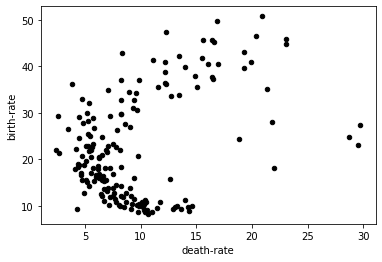

In [41]:
#q30
countries.plot.scatter(x='death-rate', y='birth-rate', color="black")

In [42]:
#q31

qry =( """
SELECT country, "death-rate", "birth-rate"
FROM countries
WHERE ("death-rate" > 18) &  (17<"birth-rate") & ("birth-rate"<30)
ORDER BY "death-rate" ASC
""")

q31=pd.read_sql(qry, conn)
q31

,country,death-rate,birth-rate
0,Namibia,18.86,24.32
1,Zimbabwe,21.84,28.01
2,South Africa,22.00,18.20
3,Lesotho,28.71,24.75
4,Botswana,29.50,23.08
5,Swaziland,29.74,27.41


In [43]:
#q32
df=countries[["country","birth-rate","death-rate"]]
df.set_index("country")
df.corr().iloc[0,1]

0.3965086117752512

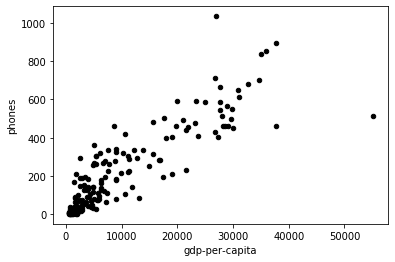

In [44]:
#q33
countries.plot.scatter(x='gdp-per-capita', y='phones', color="black")

In [45]:
#q34
df=countries[["country","gdp-per-capita","phones"]]
df.set_index("country")
df.corr().iloc[0,1]

0.8786946640591311

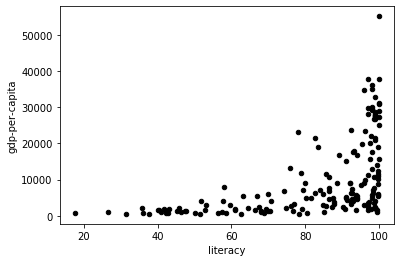

In [46]:
#q35
countries.plot.scatter(y='gdp-per-capita', x='literacy', color="black")

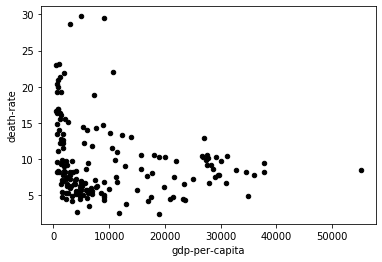

In [47]:
#q36
countries.plot.scatter(x='gdp-per-capita', y='death-rate', color="black")

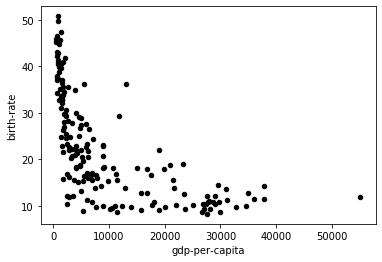

In [48]:
#q37
countries.plot.scatter(x='gdp-per-capita', y='birth-rate', color="black")

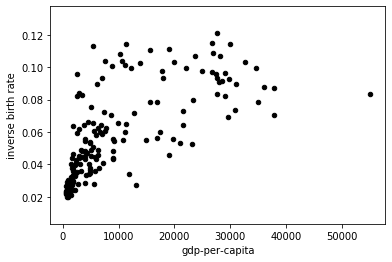

In [49]:
#q38
qry =( """
SELECT country, "gdp-per-capita", "birth-rate", 1 / "birth-rate" AS "inverse birth rate"
FROM countries
""")
q38=pd.read_sql(qry, conn)
q38.plot.scatter(x='gdp-per-capita', y='inverse birth rate', color="black")

In [50]:
#q39
import numpy as np

q38["1"] = 1
res = np.linalg.lstsq(q38[["gdp-per-capita", "1"]], 
                      q38["inverse birth rate"], 
                      rcond=None)
# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
q39=(m,n)
q39

(1.836570392623344e-06, 0.03916624252079352)

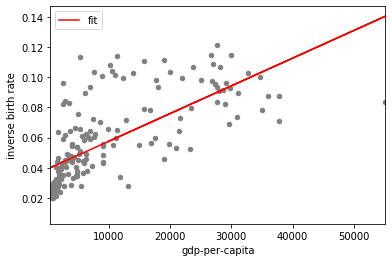

In [51]:
#q40
ax = q38.plot.scatter(x='gdp-per-capita', y='inverse birth rate',color="0.5")

q38["fit"] = q38["gdp-per-capita"] * m + n
q38.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [52]:
#conn.close()